## Домашнее задание №3
Определить, на основе входных данных, курит человек или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking_train.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


In [3]:
df.shape

(44554, 27)

C:\Users\bychk\AppData\Local\Temp\ipykernel_11788\3560373835.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True, cmap='Blues')


<Axes: >

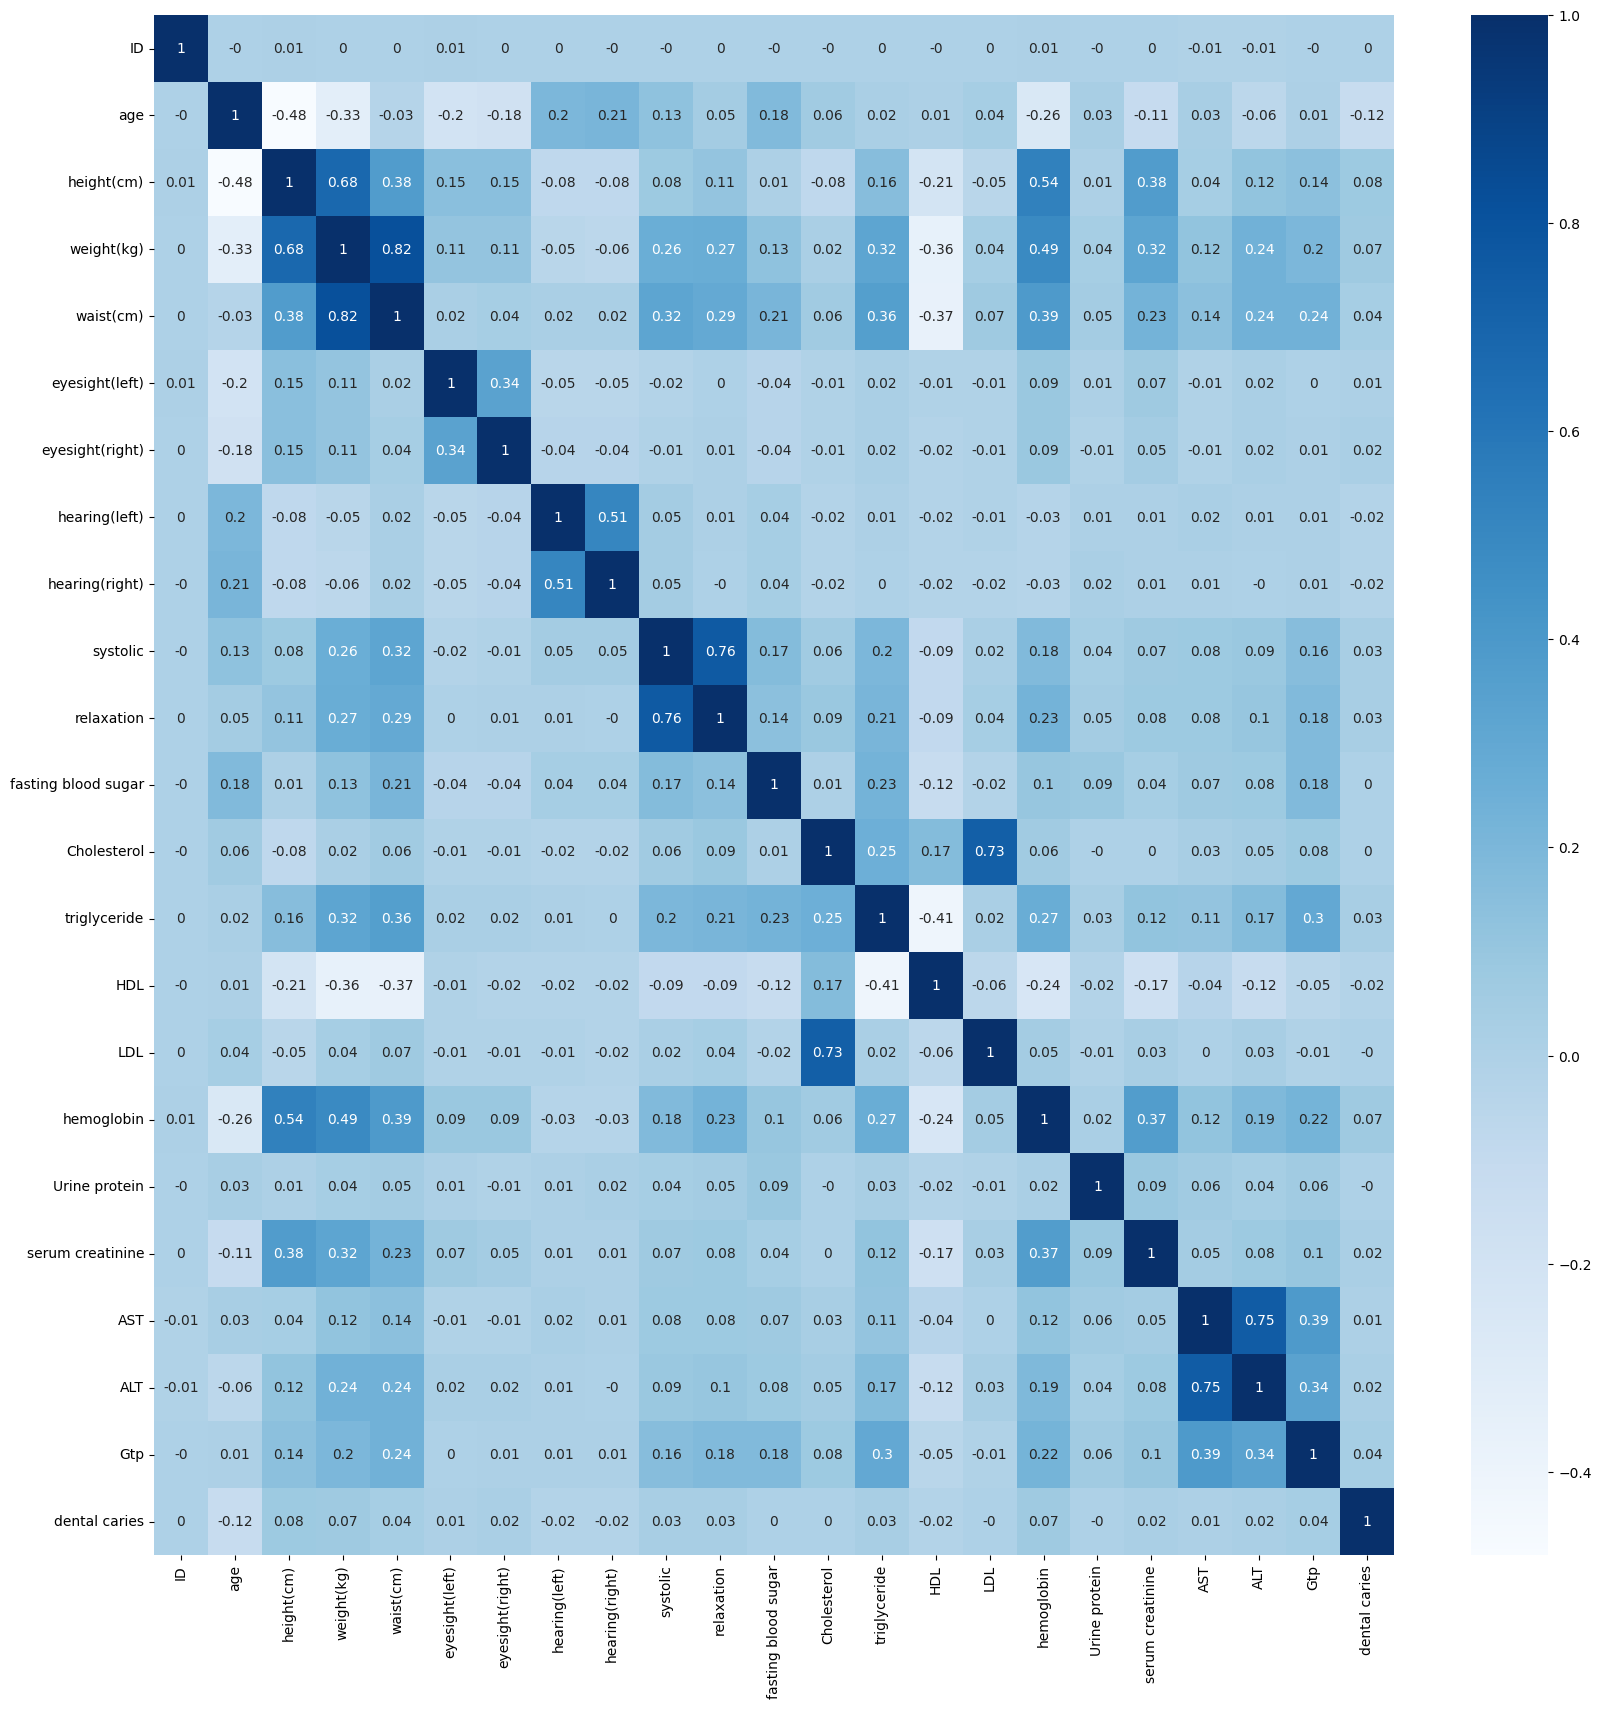

In [4]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr().round(2), annot=True, cmap='Blues')

Удалим столбец ID, так как он не играет роли в анализе.

In [5]:
df = df.drop(columns="ID")
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,128.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,116.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


### Работа с пропусками

In [6]:
df.isnull().sum()

gender                   0
age                    440
height(cm)               0
weight(kg)              44
waist(cm)                0
eyesight(left)           0
eyesight(right)          0
hearing(left)            0
hearing(right)           0
systolic                 0
relaxation               0
fasting blood sugar      0
Cholesterol              0
triglyceride             0
HDL                      0
LDL                      0
hemoglobin               0
Urine protein            0
serum creatinine         0
AST                      0
ALT                      0
Gtp                      0
oral                     0
dental caries            0
tartar                   0
smoking                  0
dtype: int64

Заполним пропуски в столбце *age* и *weight* средними значениями.

In [7]:
df['age'] = df['age'].fillna(df['age'].mean())

In [8]:
df['weight(kg)'] = df['weight(kg)'].fillna(df[df['weight(kg)'].isna()]['waist(cm)']*0.82)

In [9]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

### Работа с категориальными перменными

In [10]:
df.select_dtypes(["object"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   44554 non-null  object
 1   oral     44554 non-null  object
 2   tartar   44554 non-null  object
 3   smoking  44554 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [11]:
df['gender'].value_counts()

M    28372
F    16182
Name: gender, dtype: int64

In [12]:
df['gender'] = [0 if (item == 'M') else 1 for item in df['gender']]
df['gender'].value_counts()

0    28372
1    16182
Name: gender, dtype: int64

In [13]:
df['oral'].value_counts()

Y    44554
Name: oral, dtype: int64

In [14]:
df['oral'] = [1 for item in df['gender']]
df['oral'].value_counts()

1    44554
Name: oral, dtype: int64

In [15]:
df['tartar'].value_counts()

Y    24785
N    19769
Name: tartar, dtype: int64

In [16]:
df['tartar'] = [0 if (item == 'N') else 1 for item in df['tartar']]
df['tartar'].value_counts()

1    24785
0    19769
Name: tartar, dtype: int64

In [17]:
df['smoking'].value_counts()

no     28170
yes    16384
Name: smoking, dtype: int64

In [18]:
df['smoking'] = [0 if (item == 'no') else 1 for item in df['smoking']]
df['smoking'].value_counts()

0    28170
1    16384
Name: smoking, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44554 non-null  int64  
 1   age                  44554 non-null  float64
 2   height(cm)           44554 non-null  int64  
 3   weight(kg)           44554 non-null  float64
 4   waist(cm)            44554 non-null  float64
 5   eyesight(left)       44554 non-null  float64
 6   eyesight(right)      44554 non-null  float64
 7   hearing(left)        44554 non-null  float64
 8   hearing(right)       44554 non-null  float64
 9   systolic             44554 non-null  float64
 10  relaxation           44554 non-null  float64
 11  fasting blood sugar  44554 non-null  float64
 12  Cholesterol          44554 non-null  float64
 13  triglyceride         44554 non-null  float64
 14  HDL                  44554 non-null  float64
 15  LDL                  44554 non-null 

### Стандартизация данных

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = df.drop(columns="smoking")
y = df[['smoking']]

In [22]:
std = StandardScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_std

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,-0.755216,0.898022,0.580744,-0.458281,-0.220828,-0.440215,-0.423733,-0.16386,-0.164653,1.208179,...,0.874419,0.752820,-0.215708,0.514185,-0.269763,-0.341084,-0.355909,0.0,-0.520517,-1.119701
1,-0.755216,-0.349103,0.037847,0.321498,0.641678,1.013009,0.998673,-0.16386,-0.164653,-1.571897,...,2.692977,0.048630,-0.215708,0.514185,-0.373693,-0.034033,-0.434923,0.0,-0.520517,0.893095
2,1.324125,-0.349103,-1.047946,-0.458281,0.426052,-0.025008,-0.017331,-0.16386,-0.164653,-0.108699,...,-0.192468,-1.359750,-0.215708,-1.292804,-0.529587,-0.402494,-0.355909,0.0,-0.520517,-1.119701
3,-0.755216,-1.180520,1.666537,0.711388,0.318238,0.390199,0.389071,-0.16386,-0.164653,0.476580,...,0.340976,1.008889,-0.215708,1.417680,-0.425657,-0.003328,-0.138619,0.0,-0.520517,0.893095
4,-0.755216,-0.349103,-0.505049,-0.458281,0.372145,-0.025008,-0.017331,-0.16386,-0.164653,-0.401338,...,1.019904,1.521028,-0.215708,-0.841057,-0.269763,-0.003328,-0.020098,0.0,1.921167,0.893095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,1.324125,1.313730,-1.590842,-1.238061,-0.759894,-0.025008,0.389071,-0.16386,-0.164653,-1.425577,...,0.025759,-1.295733,-0.215708,-0.389309,-0.009938,-0.187559,-0.513938,0.0,-0.520517,0.893095
44550,1.324125,0.066605,-0.505049,-1.238061,-1.298960,0.390199,0.389071,-0.16386,-0.164653,-1.498737,...,-0.871396,-0.399491,-0.215708,0.062438,-0.321728,-0.463905,-0.513938,0.0,-0.520517,0.893095
44551,1.324125,0.898022,-0.505049,-1.238061,-1.460680,-0.025008,0.389071,-0.16386,-0.164653,-0.328178,...,-1.259355,-1.423768,-0.215708,-1.744552,-0.477622,-0.494610,-0.553445,0.0,-0.520517,-1.119701
44552,-0.755216,1.313730,0.037847,-0.458281,-0.436454,-0.440215,-0.017331,-0.16386,-0.164653,0.842380,...,0.753182,-0.143422,-0.215708,-0.841057,-0.321728,-0.248969,-0.434923,0.0,-0.520517,-1.119701


### Логистическая регрессия

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

In [25]:
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\bychk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
accuracy_score(y_test, y_pred)

0.7456612806702573

In [28]:
confusion_matrix(y_test, y_pred)

array([[3340,  953],
       [ 747, 1644]], dtype=int64)

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(fp)
print(fn)

953
747


### Работа с тестовыми данными

In [29]:
df_test = pd.read_csv('smoking_test.csv')
df_test.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,48715,M,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,...,145.0,14.5,1.0,1.0,17.0,18.0,30.0,Y,0,N
1,49650,M,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,...,99.0,15.3,1.0,0.9,18.0,14.0,22.0,Y,0,Y
2,18013,F,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,...,120.0,13.4,1.0,0.7,19.0,21.0,13.0,Y,0,N
3,24282,F,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,...,105.0,13.6,1.0,0.6,18.0,16.0,16.0,Y,0,Y
4,9215,M,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,...,57.0,16.6,1.0,0.9,18.0,11.0,22.0,Y,0,N


In [30]:
ID = df_test["ID"]
df_test = df_test.drop(columns="ID")
df_test.shape

(11138, 25)

In [31]:
df_test.isna().sum()

gender                   0
age                    117
height(cm)               0
weight(kg)              12
waist(cm)                0
eyesight(left)           0
eyesight(right)          0
hearing(left)            0
hearing(right)           0
systolic                 0
relaxation               0
fasting blood sugar      0
Cholesterol              0
triglyceride             0
HDL                      0
LDL                      0
hemoglobin               0
Urine protein            0
serum creatinine         0
AST                      0
ALT                      0
Gtp                      0
oral                     0
dental caries            0
tartar                   0
dtype: int64

In [32]:
df_test['age'] = df_test['age'].fillna(df_test['age'].mean())
df_test['weight(kg)'] = df_test['weight(kg)'].fillna(df_test[df_test['weight(kg)'].isna()]['waist(cm)']*0.82)

In [33]:
df_test['oral'].value_counts()

Y    11138
Name: oral, dtype: int64

In [34]:
df_test['gender'] = [0 if (item == 'M') else 1 for item in df_test['gender']]
df_test['oral'] = [0 if (item == 'N') else 1 for item in df_test['gender']]
df_test['tartar'] = [0 if (item == 'N') else 1 for item in df_test['tartar']]

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               11138 non-null  int64  
 1   age                  11138 non-null  float64
 2   height(cm)           11138 non-null  int64  
 3   weight(kg)           11138 non-null  float64
 4   waist(cm)            11138 non-null  float64
 5   eyesight(left)       11138 non-null  float64
 6   eyesight(right)      11138 non-null  float64
 7   hearing(left)        11138 non-null  float64
 8   hearing(right)       11138 non-null  float64
 9   systolic             11138 non-null  float64
 10  relaxation           11138 non-null  float64
 11  fasting blood sugar  11138 non-null  float64
 12  Cholesterol          11138 non-null  float64
 13  triglyceride         11138 non-null  float64
 14  HDL                  11138 non-null  float64
 15  LDL                  11138 non-null 

In [36]:
X_test = df_test

In [37]:
X_test_std = std.fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

X_test_std

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,-0.764577,-0.346538,1.681742,0.717095,0.319423,-0.029446,0.427628,-0.154601,-0.160585,0.472254,...,0.755010,-0.074213,-0.214233,0.522287,-0.462219,-0.374331,-0.198057,0.0,-0.521716,-1.111395
1,-0.764577,-1.600653,1.681742,0.717095,0.189966,-0.423877,0.427628,-0.154601,-0.160585,-0.403373,...,-0.405454,0.434026,-0.214233,0.072141,-0.411702,-0.545519,-0.361549,0.0,-0.521716,0.899770
2,1.307913,0.489538,-1.055623,-0.064775,0.459668,-1.409954,0.427628,-0.154601,-0.160585,-1.497906,...,0.124323,-0.773043,-0.214233,-0.828150,-0.361184,-0.245939,-0.545478,0.0,-0.521716,-1.111395
3,1.307913,-0.346538,-1.055623,-1.628517,-0.867264,0.364985,-0.006727,-0.154601,-0.160585,-1.278999,...,-0.254089,-0.645983,-0.214233,-1.278295,-0.411702,-0.459925,-0.484169,0.0,-0.521716,0.899770
4,-0.764577,-1.182615,1.134269,0.326160,-0.327861,-0.423877,0.427628,-0.154601,-0.160585,-0.184466,...,-1.465009,1.259916,-0.214233,0.072141,-0.411702,-0.673910,-0.361549,0.0,-0.521716,-1.111395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,1.307913,0.489538,-0.508150,-0.846646,-1.708733,-0.818308,-1.309792,-0.154601,-0.160585,-0.257435,...,1.587517,-1.344813,-0.214233,-0.378004,-0.209631,-0.417128,-0.484169,0.0,-0.521716,-1.111395
11134,-0.764577,-1.182615,0.039323,-0.064775,-0.651503,-0.029446,1.079160,-0.154601,-0.160585,0.618191,...,0.805465,0.179907,-0.214233,0.972432,0.295545,0.182032,-0.422859,0.0,-0.521716,0.899770
11135,1.307913,2.161691,-2.150569,-1.237581,-0.112100,-0.423877,-0.223905,-0.154601,-0.160585,-0.111497,...,-0.884776,0.179907,-0.214233,-0.828150,0.497615,0.224829,-0.422859,0.0,-0.521716,-1.111395
11136,-0.764577,-0.346538,1.134269,1.108031,0.017357,-0.621092,-1.092615,-0.154601,-0.160585,0.618191,...,-0.127952,2.149336,-0.214233,1.422578,0.497615,1.080771,0.639841,0.0,1.916753,0.899770


In [38]:
y_test_pred = model.predict(X_test_std)
y_test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
y_test_pred = ['no' if (item == 0) else 'yes' for item in y_test_pred]
y_test_pred

['no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',


In [40]:
result = pd.DataFrame({'ID': [i for i in ID], 'smoking': y_test_pred})
result

,ID,smoking
0,48715,no
1,49650,yes
2,18013,no
3,24282,no
4,9215,yes
...,...,...
11133,20787,no
11134,5000,no
11135,36617,no
11136,38229,yes


In [41]:
result.to_csv('result.csv', index=False)